In [1]:
""" Muhammad Sameer Bin Raees    
    Hassaan Akbar Cheema         
    Rao Nouman Ahmad             """

' Muhammad Sameer Bin Raees    \n    Hassaan Akbar Cheema         \n    Rao Nouman Ahmad             '

In [180]:
import numpy
import matplotlib
from PIL import Image
import os, sys
from PIL import ImageFilter
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt 
import sys as sys
import cv2
from scipy.signal import find_peaks

In [181]:
##################################### RGB TO BINARY CONVERSION ################################################

In [182]:
def rgb_to_binary(url):
    im = Image.open(url).convert("L")
    test = im.point(lambda x: 0 if x<210 else 1)
    test.save("binary.png")
    image = misc.imread("binary.png")
    print("shape = ", image.shape)
    plt.imshow(image, cmap = matplotlib.cm.Greys_r) 
    plt.show()
    return image

In [183]:
##################################### FIRST PASS ################################################

In [184]:
def first_pass(v,image):
    compare = []
    lab = 50
    container = np.full(image.shape, 0, dtype=int)
    for r in range(len(image)-1): 
        for c in range(len(image[r])-1): 
            
            if image[r][c] == v:
                
                if r == 0 and c == 0:
                    container[r][c] = lab
                    lab += 1

                elif r == 0:
                    if container[r][c-1] == 0:
                        container[r][c] = lab
                        lab += 1
                    else:
                        container[r][c] = container[r][c-1]

                elif c == 0:
                    if container[r-1][c] == 0 and container[r-1][c+1] == 0:
                        container[r][c] = lab
                        lab += 1
                    elif container[r-1][c] == 0:
                        container[r][c] = container[r-1][c+1] 
                    elif container[r-1][c+1] == 0:
                        container[r][c] = container[r-1][c]
                    else:
                        container[r][c] = min(container[r-1][c], container[r-1][c+1])
                        
                else:
                    if container[r-1][c-1]==0 and container[r-1][c]==0 and container[r-1][c+1]==0 and container[r][c-1]==0:
                        container[r][c] = lab
                        lab += 1
                        
                    else:
                        mylist = [x for x in [container[r-1][c-1],container[r-1][c],container[r-1][c+1],container[r][c-1]] if x != 0] 
                        minimum = min(mylist)
                        container[r][c] = minimum
                        for x in mylist:
                            if x != minimum:
                                compare.append((minimum,x)) 
                    
    print("First Pass: ")
    plt.imshow(container, cmap = matplotlib.cm.nipy_spectral) 
    plt.show()
    compare = list(set(compare))
    return (container,compare)


In [185]:
##################################### SECOND PASS ################################################

In [186]:
def second_pass(compare,container):
    print("Second Pass: ")
    print("Dictionary for Second Pass: ")
    print(compare)
    for x in compare:    
        for r in range(len(container)): 
                for c in range(len(container[r])):
                    if container[r][c] == x[1]:
                        container[r][c] = x[0]
    plt.imshow(container, cmap = matplotlib.cm.nipy_spectral) 
    plt.show()

In [187]:
############################################# Funtion Testing ################################################

In [188]:
def model(image_url, mode):
    image = rgb_to_binary(image_url)
    output = first_pass(mode,image);
    container = output[0]
    compare = output[1]
    second_pass(compare,container)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


shape =  (525, 525)


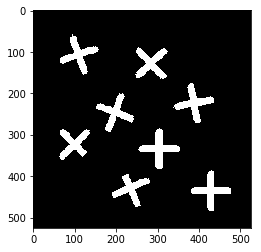

First Pass: 


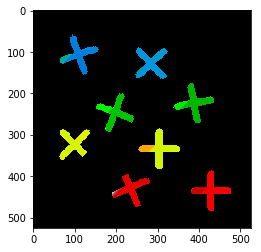

Second Pass: 
Dictionary for Second Pass: 
[(134, 137), (86, 87), (62, 64), (95, 104), (115, 122), (86, 90), (99, 126), (131, 149), (146, 147), (73, 82), (135, 139), (130, 133), (57, 86), (133, 136), (96, 97), (113, 114), (177, 178), (174, 176), (172, 173), (65, 78), (131, 159), (73, 75), (169, 177), (99, 125), (146, 148), (75, 77), (131, 165), (135, 142), (182, 184), (77, 79), (99, 129), (56, 58), (65, 68), (184, 186), (57, 59), (95, 98), (99, 103), (131, 154), (55, 56), (50, 55), (185, 190), (60, 62), (109, 110), (131, 160), (181, 182), (135, 141), (189, 192), (113, 120), (57, 65), (167, 170), (131, 132), (132, 135), (50, 56), (50, 69), (132, 146), (153, 155), (135, 144), (130, 140), (112, 115), (57, 60), (65, 66), (95, 107), (62, 65), (151, 158), (99, 108), (86, 91), (169, 181), (131, 148), (130, 151), (50, 61), (135, 138), (57, 85), (169, 174), (57, 63), (53, 55), (169, 176), (50, 51), (99, 124), (99, 113), (131, 164), (71, 73), (75, 81), (166, 167), (99, 128), (166, 170), (65, 72)

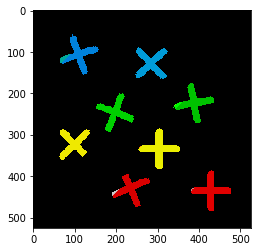

In [189]:
model("Image_01.bmp",1)